# Plot distribution to visualize variances in single features

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import sys
sys.path.append("../")
from src import data

import warnings
warnings.filterwarnings('ignore')

In [97]:
from tueplots import bundles
plt.rcParams.update(bundles.neurips2021(usetex=False))

Get data

In [104]:
pop_songs, non_pop_songs = data.get_split_dfs(drop_columns=['id','name','popularity','key'])

In [105]:
pop_songs = pop_songs.dropna()
non_pop_songs = non_pop_songs.dropna()

In [106]:
pop_songs_l = pd.melt(pop_songs)
pop_songs_l['type'] = "pop"
non_pop_songs_l = pd.melt(non_pop_songs)
non_pop_songs_l['type'] = "non-pop"
all_songs = non_pop_songs_l.append(pop_songs_l)

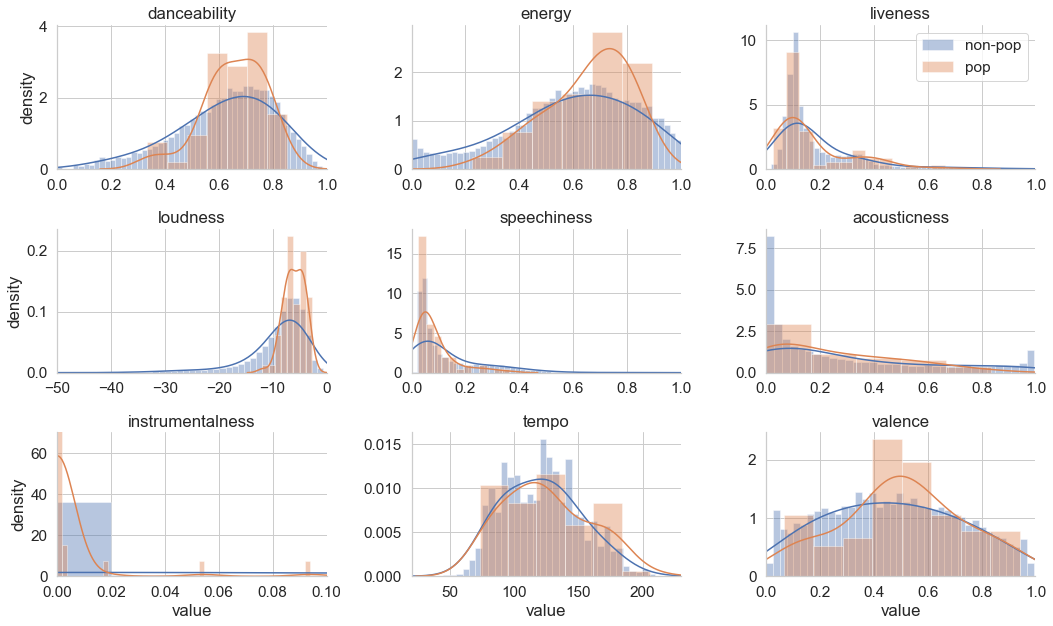

In [125]:
sns.set(font_scale=1.4)
sns.set_style("whitegrid")
g = sns.FacetGrid(all_songs, col="variable", hue="type", col_wrap=3, sharey=False, sharex=False, aspect=1.66,margin_titles=True)
g.map(sns.distplot, "value", kde_kws={'bw':0.5})
g.set(xlim=(0, 1))
g.set_ylabels("density")
g.axes[2].legend()
g.axes[3].set(xlim=(-50, 0))
g.axes[6].set(xlim=(0, 0.1))
g.axes[6].set(ylim=(0, 70))
g.axes[7].set(xlim=(20, 230))
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
plt.savefig("002_variances.pdf")
plt.show()